In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("student.csv")

In [3]:
df.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low


In [4]:
df.shape

(5000, 10)

In [5]:
df.isnull().sum()

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB


In [9]:
df.describe()

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000


In [10]:
df.nunique()

Name                 4824
Age                    28
Gender                  2
Hours_Studied        5000
IQ                     71
Physics_Marks          61
Math_Marks             61
Chemistry_Marks        61
Has_Part_Time_Job       2
Study_Hours_Group       2
dtype: int64

In [49]:
df['PCM'] = df[['Physics_Marks', 'Chemistry_Marks', 'Math_Marks']].mean(axis=1)
df.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,PCM
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,71.666667
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,73.666667
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,65.333333
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,79.666667
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,75.333333


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

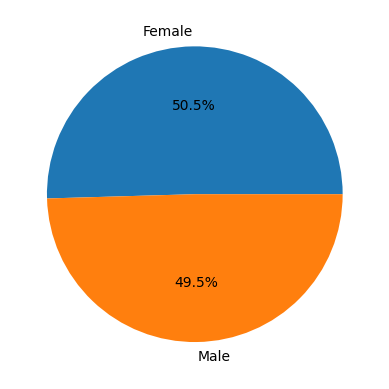

In [38]:
x = df['Gender'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

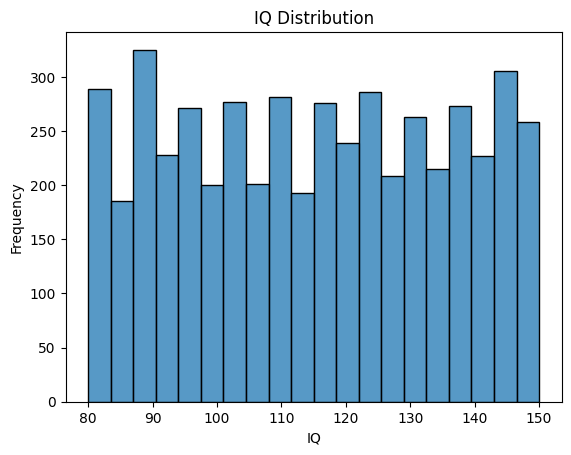

In [30]:

sns.histplot(df['IQ'], bins=20)
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.title('IQ Distribution')
plt.show()



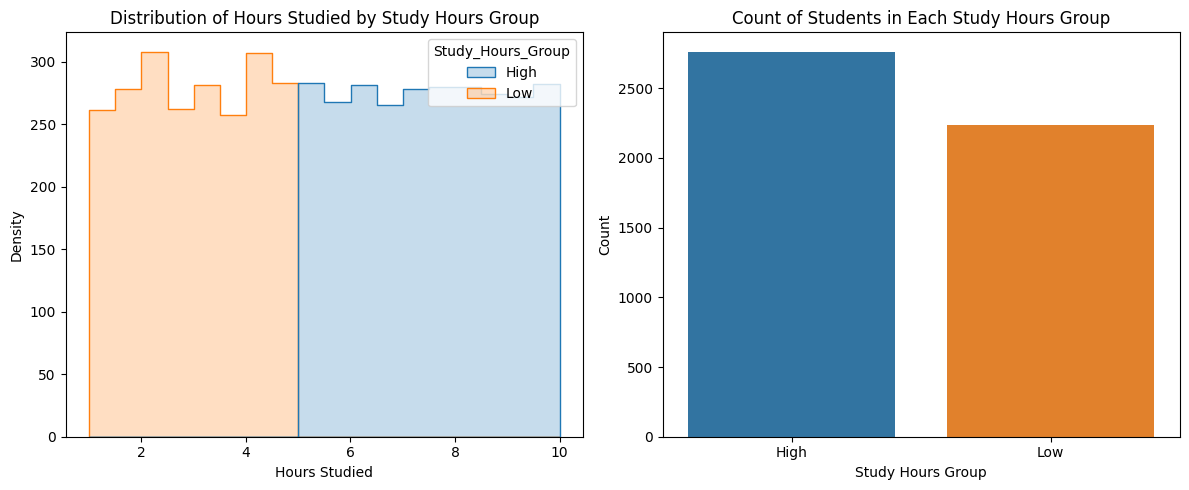

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='Hours_Studied', hue='Study_Hours_Group', element='step', common_norm=False, ax=axes[0])
axes[0].set_xlabel('Hours Studied')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Hours Studied by Study Hours Group')

sns.countplot(data=df, x='Study_Hours_Group', ax=axes[1])
axes[1].set_xlabel('Study Hours Group')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Students in Each Study Hours Group')
plt.tight_layout()
plt.show()


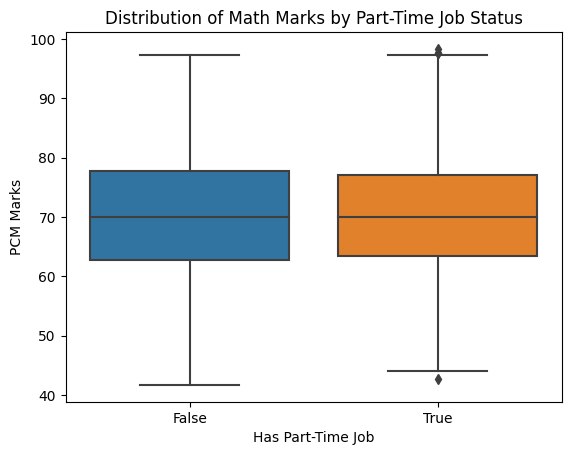

In [77]:
sns.boxplot(data=df, x='Has_Part_Time_Job', y='PCM')
plt.xlabel('Has Part-Time Job')
plt.ylabel('PCM Marks')
plt.title('Distribution of Math Marks by Part-Time Job Status')
plt.show()


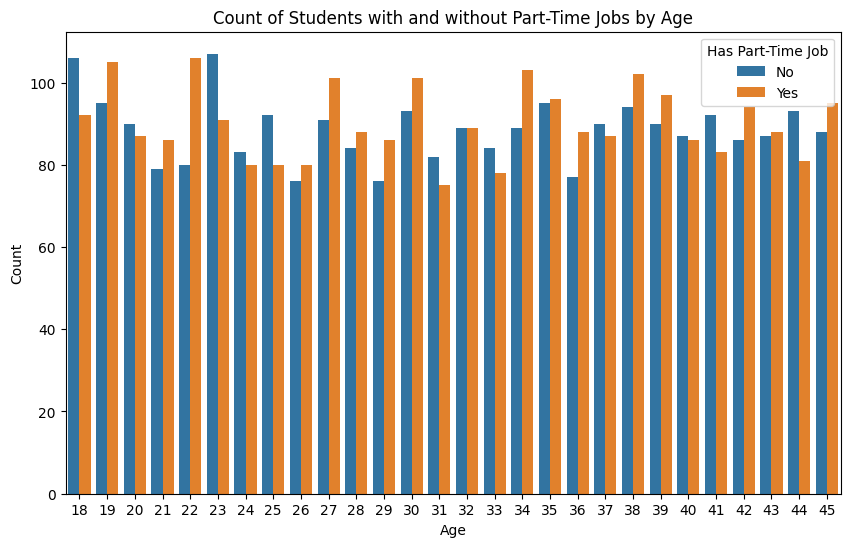

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='Has_Part_Time_Job')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Students with and without Part-Time Jobs by Age')
plt.legend(title='Has Part-Time Job', labels=['No', 'Yes'])
plt.show()

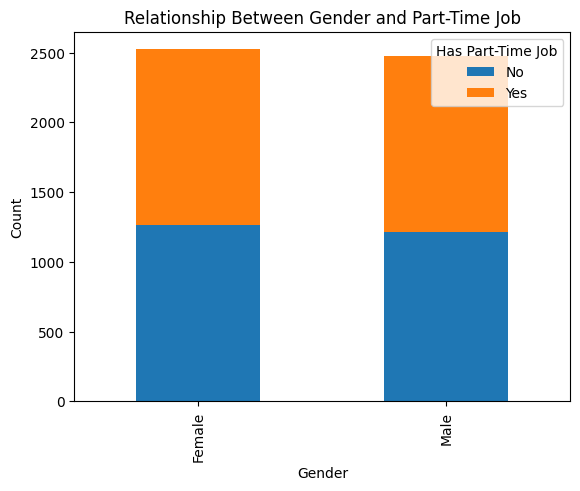

In [66]:
contingency_table = pd.crosstab(df['Gender'], df['Has_Part_Time_Job'])
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship Between Gender and Part-Time Job')
plt.legend(title='Has Part-Time Job', labels=['No', 'Yes'])
plt.show()

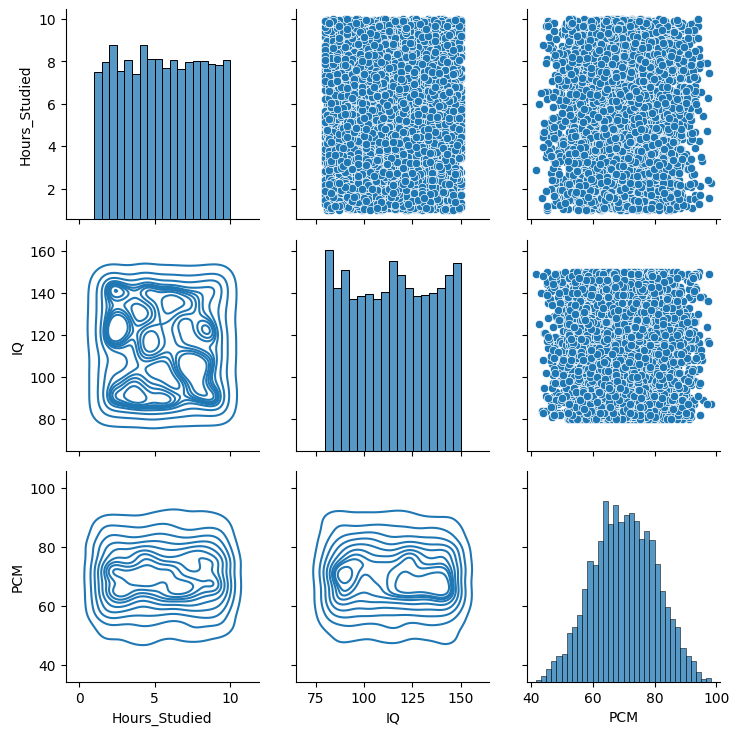

In [76]:
g = sns.PairGrid(df, vars=['Hours_Studied', 'IQ', 'PCM'])
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
plt.show()


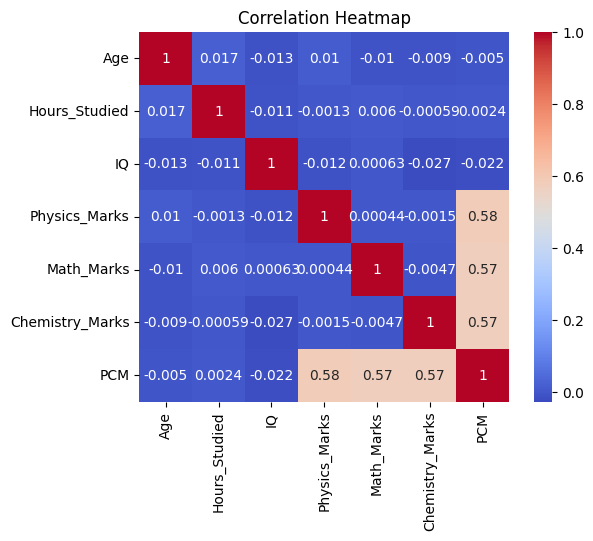

In [75]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [80]:
features = df[['Hours_Studied', 'IQ', 'PCM']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
n_components = 3
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(features_scaled)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])


explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratios: {explained_variance_ratio}")

total_variance = sum(explained_variance_ratio)
print(f"Total Explained Variance: {total_variance}")



Explained Variance Ratios: [0.34181586 0.33271405 0.32547008]
Total Explained Variance: 0.9999999999999999


In [81]:
X = df[['Hours_Studied', 'Has_Part_Time_Job', 'IQ']]
y = df['PCM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [-0.04538421  0.10292921 -0.00903476]
Intercept: 71.09783810656523


In [82]:
y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 101.9114468644011
R-squared: -0.003665443477996577


 MSE is high and r^2 in not a good fit. I think it is because some students with low iq are getting good marks
and sonme students who have studied more hours are getting less marks. So there is no relationship between this 
features.You can also observe this in the following plot. 

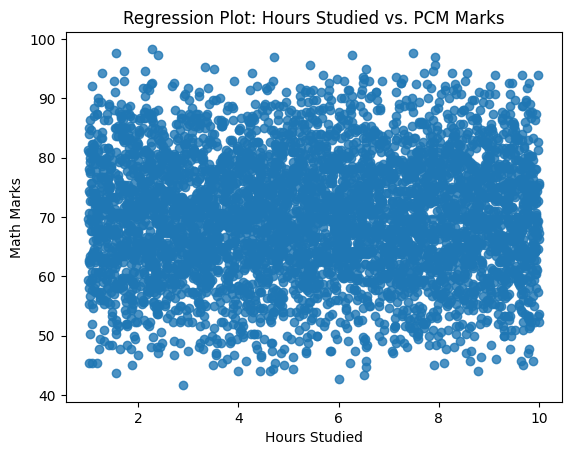

In [85]:
sns.regplot(data=df, x='Hours_Studied', y='PCM')
plt.xlabel('Hours Studied')
plt.ylabel('Math Marks')
plt.title('Regression Plot: Hours Studied vs. PCM Marks')
plt.show()